> ## GERMAN CREDIT DATASET ÜZERİNDE ÖZELLİK MÜHENDİSLİĞİ & VERİ ÖN İŞLEME

### ****Veri Ön İşleme, veriden daha sağlıklı sonuçların çıkarılmasını sağlayan bir veri temizleme yöntemidir.Verinin bir modele girebilmesi için yapılan hazırlıktır.Aykırı ve gürültülü değerlerden veriyi temizlemek için uygulanır.****

Kullanılan data bir banka datasıdır, hedef değişkeni risk olup gözlemlerin bazı parametrelere göre kredilerini ödeyip ödeyememe risklerini anlatır.Risk değişkeni 'good' ise riskli değil 'bad' ise riskli olduğunu belirtir.

* Gerekli kütüphanelerin import edilmesi
### Dataset Link 
#### [Here](https://www.kaggle.com/uciml/german-credit/code)

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)

* Verinin okutulması

In [2]:
dff=pd.read_csv("../input/german-credit-data-with-risk/german_credit_data.csv")

* Son aşamada veri ön işleme yapılmadan veriyi modele katıp farkı görmek için burada veriyi kopyalıyoruz.

In [3]:
df=dff.copy()

* İlk 5 satırı görüntüleme

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


* Gereksiz bir column var indexle aynı o yüzden onu siliyoruz

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

### 1-Aykırı değerlerin belirlenmesi

In [6]:
q1 = df["Age"].quantile(0.25)
q3 = df["Age"].quantile(0.80)
iqr = q3 - q1
up = q3 + 1.5 * iqr
low = q1 - 1.5 * iqr

In [7]:
up

72.0

In [8]:
low

0.0

* Aykırı değerlerin listelenmesi

In [9]:
df[(df["Age"] < low) | (df["Age"] > up)]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
186,74,female,3,free,little,moderate,5129,9,car,bad
330,75,male,3,free,little,little,6615,24,car,good
430,74,male,1,own,little,NaN,3448,5,business,good
536,75,female,3,own,NaN,little,1374,6,car,good
606,74,male,3,own,little,NaN,4526,24,business,good
756,74,male,0,own,little,rich,1299,6,car,good


* Satırda veya sütunda aykırı değer var mı sorusunun cevabını döndürüyor

In [10]:
df[(df["Age"] > up) | (df["Age"] < low)].any(axis=None)

True

### 2-Aykırı değerleri belirlediğimiz çeyreklikteki değerlere baskılıyoruz.Yani 0'dan küçük age değeri varsa onlara 0 atıyoruz aynı şekilde 72'den büyük bir değer varsa da onları 72'ye eşitliyoruz bu şekilde aykırı değerler baskılanıyor.

In [11]:
df.loc[df["Age"] < low,"Age"]=low

In [12]:
df.loc[df["Age"] > up,"Age"]=up

* Aykırı değer kontrolü yapıyoruz, baskılama işlemimiz sorunsuz gerçekleşmiş mi diye.
* False dönmesini bekliyoruz.

In [13]:
df[(df["Age"] > up) | (df["Age"] < low)].any(axis=None)

False

### 3-Eksik değer sorunu ve null değerlerin doldurulması

* Dataframedeki columnlara göre toplam boş değer sayısı

In [14]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [15]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67.0,male,2,own,NaN,little,1169,6,radio/TV,good
1,22.0,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49.0,male,1,own,little,NaN,2096,12,education,good
3,45.0,male,2,free,little,little,7882,42,furniture/equipment,good
4,53.0,male,2,free,little,little,4870,24,car,bad


* Kategorik değişkenlerde eksik değer olduğundan tipi object olan ve eşşiz sınıf sayısı 10'dan küçük olanların boş değerlerini mode'larıyla dolduruyoruz.

In [16]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [17]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67.0,male,2,own,little,little,1169,6,radio/TV,good
1,22.0,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49.0,male,1,own,little,little,2096,12,education,good
3,45.0,male,2,free,little,little,7882,42,furniture/equipment,good
4,53.0,male,2,free,little,little,4870,24,car,bad


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Sex               1000 non-null   object 
 2   Job               1000 non-null   int64  
 3   Housing           1000 non-null   object 
 4   Saving accounts   1000 non-null   object 
 5   Checking account  1000 non-null   object 
 6   Credit amount     1000 non-null   int64  
 7   Duration          1000 non-null   int64  
 8   Purpose           1000 non-null   object 
 9   Risk              1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.2+ KB


* Age değerlerini integer'a çeviriyorum.

In [19]:
df["Age"]=[int(i) for i in df["Age"]]

* Eksik değer sorunu çözülmüş mü kontrol ediyorum.

In [20]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [21]:
df["Age"].describe()

count    1000.000000
mean       35.532000
std        11.328959
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        72.000000
Name: Age, dtype: float64

* Age değişkenini belirlediğim quantile değerlerine göre kategorize ediyorum; genç,yetişkin,yaşlı olarak.

In [22]:
q25 = df["Age"].quantile(0.25)
q90 = df["Age"].quantile(0.90)

In [23]:
q25

27.0

In [24]:
q90

52.0

In [25]:
df.loc[df["Age"]< q25,"new_age"]="young"

In [26]:
df.loc[(df["Age"] >= q25) & (df["Age"]< q90),"new_age"]="mature"

In [27]:
df.loc[(df["Age"] >= q90),"new_age"]="senior"

* İkili değerlere göre risk durumunu kontrol etmek istediğimden ve bunları teker teker yazmak zor olacağından fonksiyon yazıyorum.

In [28]:
def twice_col(df,col1,col2):
    n=df[col1].unique().tolist()
    l=len(n)
    n1=df[col2].unique().tolist()
    l1=len(n1)
    for i in n:
        for j in range(l):
            for z in n1:
                for t in range(l1):
                    df.loc[(df[col1] == n[j]) & (df[col2] == n1[t]), str(col1) + "_" + str(col2)]=str(n[j]) +"_"+ str(n1[t])
        

In [29]:
twice_col(df,"new_age","Sex")

In [30]:
twice_col(df,"Sex","Housing")

In [31]:
twice_col(df,'new_age',"Housing")

In [32]:
twice_col(df,"Job","Housing")

* Job değişkenine ait frekansları saydırıyorum, 4 unique değer olduğunu görüyorum.Herhangi bir işlem yapmamıza gerek yok.

In [33]:
df["Job"].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

* Kredi ödeme sürelerinde de fazla unique değer olduğundan model için 4 kategoriye ayıralım.

In [34]:
df["Duration"].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])

In [35]:
df["Duration"].describe().T

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64

In [36]:
df.loc[df["Duration"] < 18,"new_duration"]= "A"
df.loc[(df["Duration"] >= 18) & (df["Duration"] <30),"new_duration"]= "B"
df.loc[(df["Duration"] >= 30) & (df["Duration"] <48),"new_duration"]= "C"
df.loc[df["Duration"] >= 48,"new_duration"]= "D"

In [37]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,new_age,new_age_Sex,Sex_Housing,new_age_Housing,Job_Housing,new_duration
0,67,male,2,own,little,little,1169,6,radio/TV,good,senior,senior_male,male_own,senior_own,2_own,A
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,young,young_female,female_own,young_own,2_own,D
2,49,male,1,own,little,little,2096,12,education,good,mature,mature_male,male_own,mature_own,1_own,A
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,mature,mature_male,male_free,mature_free,2_free,C
4,53,male,2,free,little,little,4870,24,car,bad,senior,senior_male,male_free,senior_free,2_free,B


In [38]:
df["Credit amount"].describe().T

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64

* Kredi ödeme miktarlarında da aynı şekilde birçok unique değer olduğundan kategorize ediyorum.

In [39]:
q25 = df["Credit amount"].quantile(0.25)
q50 = df["Credit amount"].quantile(0.50)
q75 = df["Credit amount"].quantile(0.75)

In [40]:
df.loc[(df["Credit amount"] < q25),"new_Credit_amount"]="A"

In [41]:
df.loc[(df["Credit amount"] >= q25) & (df["Duration"] < q50),"new_Credit_amount"]= "B"

In [42]:
df.loc[(df["Credit amount"] >= q50) & (df["Duration"] < q75),"new_Credit_amount"]= "C"

In [43]:
df.loc[(df["Credit amount"] >= q75),"new_Credit_amount"]= "D"

In [44]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,new_age,new_age_Sex,Sex_Housing,new_age_Housing,Job_Housing,new_duration,new_Credit_amount
0,67,male,2,own,little,little,1169,6,radio/TV,good,senior,senior_male,male_own,senior_own,2_own,A,A
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,young,young_female,female_own,young_own,2_own,D,D
2,49,male,1,own,little,little,2096,12,education,good,mature,mature_male,male_own,mature_own,1_own,A,B
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,mature,mature_male,male_free,mature_free,2_free,C,D
4,53,male,2,free,little,little,4870,24,car,bad,senior,senior_male,male_free,senior_free,2_free,B,D


In [45]:
df["Risk"].unique()

array(['good', 'bad'], dtype=object)

### 4-Encoding

* Label encoder, kategorik değişkenleri numerik değişkenlere dönüştürmemizi sağlayan metottur.Risk de yukarıda görüldüğü gibi good ve bad olarak kategorize edilmiş bu yüzden 0 ve 1'e çevireceğiz.

In [46]:
from sklearn.preprocessing import LabelEncoder

In [78]:
labelencoder = LabelEncoder()
df["Risk"] = labelencoder.fit_transform(df["Risk"])

In [49]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,new_age,new_age_Sex,Sex_Housing,new_age_Housing,Job_Housing,new_duration,new_Credit_amount
0,67,male,2,own,little,little,1169,6,radio/TV,1,senior,senior_male,male_own,senior_own,2_own,A,A
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,young,young_female,female_own,young_own,2_own,D,D
2,49,male,1,own,little,little,2096,12,education,1,mature,mature_male,male_own,mature_own,1_own,A,B
3,45,male,2,free,little,little,7882,42,furniture/equipment,1,mature,mature_male,male_free,mature_free,2_free,C,D
4,53,male,2,free,little,little,4870,24,car,0,senior,senior_male,male_free,senior_free,2_free,B,D


* Oluşturduğumuz kategorilere göre risk ortalamasına bakmak istiyoruz, bunun için aşağıdaki gibi bir fonksiyon oluşturdum.

In [50]:
def meann(df,b):
    a={}
    for i in b:
        a[i]=df.groupby(i)["Risk"].mean()
        c=print(a,"/n")
    return c   

In [51]:
b=['Sex_Housing','new_age_Housing','Job_Housing','new_age_Sex']

In [52]:
#0 riskli olma durumu 1 olmama durumunu ifade ediyor.
#Örneğin female_free(kadın ve evsiz)'nin risk durumu yüksek mantıken kredisini de ödeyememesini bekleriz 
#female_own ise(kendi evi olan ve kadın) 'nın 1'e daha yakın yani kendi evi olan birinin
# kredisini ödemesini bekleriz
meann(df,b)

{'Sex_Housing': Sex_Housing
female_free    0.421053
female_own     0.698980
female_rent    0.589474
male_free      0.629213
male_own       0.754352
male_rent      0.630952
Name: Risk, dtype: float64} /n
{'Sex_Housing': Sex_Housing
female_free    0.421053
female_own     0.698980
female_rent    0.589474
male_free      0.629213
male_own       0.754352
male_rent      0.630952
Name: Risk, dtype: float64, 'new_age_Housing': new_age_Housing
mature_free    0.600000
mature_own     0.766932
mature_rent    0.628205
senior_free    0.571429
senior_own     0.791045
senior_rent    0.600000
young_free     0.600000
young_own      0.618056
young_rent     0.593407
Name: Risk, dtype: float64} /n
{'Sex_Housing': Sex_Housing
female_free    0.421053
female_own     0.698980
female_rent    0.589474
male_free      0.629213
male_own       0.754352
male_rent      0.630952
Name: Risk, dtype: float64, 'new_age_Housing': new_age_Housing
mature_free    0.600000
mature_own     0.766932
mature_rent    0.628205
senior_f

* Model için kategorik,numerik ve kategorik görünen fakat kardinal olan column'ları getiriyoruz.

In [54]:
cat_cols, num_cols, cat_but_car=grab_col_names(df, cat_th=10, car_th=20)

In [55]:
cat_cols

['Sex',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Purpose',
 'new_age',
 'new_age_Sex',
 'Sex_Housing',
 'new_age_Housing',
 'Job_Housing',
 'new_duration',
 'new_Credit_amount',
 'Job',
 'Risk']

In [56]:
num_cols

['Age', 'Credit amount', 'Duration']

In [57]:
cat_but_car

[]

* Burada ise tüm columnlarda gezilmesini, iki eşsiz sınıfa sahip olan ama int ve float olmayan columnları döndürmesini istiyoruz.Dönen columnlar kategorik olduğundan da label encoder ile numerik'e çeviriyoruz.

In [58]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

In [59]:
binary_cols

['Sex']

In [60]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,new_age,new_age_Sex,Sex_Housing,new_age_Housing,Job_Housing,new_duration,new_Credit_amount
0,67,1,2,own,little,little,1169,6,radio/TV,1,senior,senior_male,male_own,senior_own,2_own,A,A
1,22,0,2,own,little,moderate,5951,48,radio/TV,0,young,young_female,female_own,young_own,2_own,D,D
2,49,1,1,own,little,little,2096,12,education,1,mature,mature_male,male_own,mature_own,1_own,A,B
3,45,1,2,free,little,little,7882,42,furniture/equipment,1,mature,mature_male,male_free,mature_free,2_free,C,D
4,53,1,2,free,little,little,4870,24,car,0,senior,senior_male,male_free,senior_free,2_free,B,D


* Rare analyser fonksiyonu ile girilen dataframe,target ve kategorik columns parametrelerinin dataframe'deki sayısını, o column'daki değerlerin sayısının toplam dataframe sayısına oranını ve columnlara göre groupby yapıldığında target değişkeninin(Risk) ortalamasını bize döndürür.

In [62]:
rare_analyser(df, "Risk", cat_cols)
#male:1 female:0 
#Bu dataframede male'den 310 gözlem female'den 690 gözlem vardır. Oranları 310/1000'den 0.31,
# 690/1000'den 0.69'dur.Ve erkeklerin risk durumu kadınlarınkinden daha yüksektir.
#Devamı da bu şekilde yorumlanabilir.

Sex : 2
   COUNT  RATIO  TARGET_MEAN
0    310   0.31     0.648387
1    690   0.69     0.723188


Housing : 3
      COUNT  RATIO  TARGET_MEAN
free    108  0.108     0.592593
own     713  0.713     0.739130
rent    179  0.179     0.608939


Saving accounts : 4
            COUNT  RATIO  TARGET_MEAN
little        786  0.786     0.683206
moderate      103  0.103     0.669903
quite rich     63  0.063     0.825397
rich           48  0.048     0.875000


Checking account : 3
          COUNT  RATIO  TARGET_MEAN
little      668  0.668     0.729042
moderate    269  0.269     0.609665
rich         63  0.063     0.777778


Purpose : 8
                     COUNT  RATIO  TARGET_MEAN
business                97  0.097     0.649485
car                    337  0.337     0.685460
domestic appliances     12  0.012     0.666667
education               59  0.059     0.610169
furniture/equipment    181  0.181     0.679558
radio/TV               280  0.280     0.778571
repairs                 22  0.022     0.6

* Rare encoder fonksiyonu  kendisine parametre olarak girilen dataframe ve oranla ilgili işlem yapıyor, girilen oran parametresini alt sınır kabul edip o sınırın altındakileri rare olarak adlandırıyor ve adlandırılan birçok değişken olursa hepsi rare olduğundan oranları ve sayıları toplanıyor.Kısacası diğer olarak döndürülüyor. Dataframede az sayıda gözlemlendiğinden tek tek değerlendirip modeli de kendimizi de yormuyoruz.

In [64]:
df = rare_encoder(df, 0.05)

* Rare değişkenlerimizi aşağıda görebilirsiniz.

In [65]:
rare_analyser(df, "Risk", cat_cols)

Sex : 2
   COUNT  RATIO  TARGET_MEAN
0    310   0.31     0.648387
1    690   0.69     0.723188


Housing : 3
      COUNT  RATIO  TARGET_MEAN
free    108  0.108     0.592593
own     713  0.713     0.739130
rent    179  0.179     0.608939


Saving accounts : 4
            COUNT  RATIO  TARGET_MEAN
Rare           48  0.048     0.875000
little        786  0.786     0.683206
moderate      103  0.103     0.669903
quite rich     63  0.063     0.825397


Checking account : 3
          COUNT  RATIO  TARGET_MEAN
little      668  0.668     0.729042
moderate    269  0.269     0.609665
rich         63  0.063     0.777778


Purpose : 6
                     COUNT  RATIO  TARGET_MEAN
Rare                    46  0.046     0.630435
business                97  0.097     0.649485
car                    337  0.337     0.685460
education               59  0.059     0.610169
furniture/equipment    181  0.181     0.679558
radio/TV               280  0.280     0.778571


new_age : 3
        COUNT  RATIO  TARGE

* One hot encoder yine bir kategorik değişkenleri numerik'e dönüştürme yöntemidir.Kaç değişken döndürülecekse n-1 kadar column ile matrix oluşturulur.Örneğin;

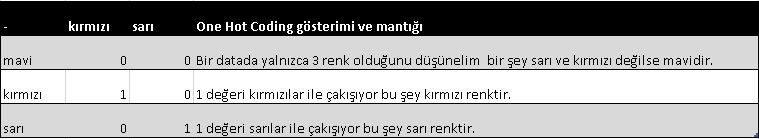

In [66]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [67]:
ohe_cols

['Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Purpose',
 'new_age',
 'new_age_Sex',
 'Sex_Housing',
 'new_age_Housing',
 'Job_Housing',
 'new_duration',
 'new_Credit_amount']

In [68]:
#one_hot_encoder
df= pd.get_dummies(df,ohe_cols, drop_first=False)

In [69]:
df=one_hot_encoder(df, ohe_cols)

In [70]:
df.head()

,Age,Sex,Credit amount,Duration,Risk,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,Housing_rent,Saving accounts_Rare,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_Rare,Purpose_business,Purpose_car,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,new_age_mature,new_age_senior,new_age_young,new_age_Sex_Rare,new_age_Sex_mature_female,new_age_Sex_mature_male,new_age_Sex_senior_male,new_age_Sex_young_female,new_age_Sex_young_male,Sex_Housing_Rare,Sex_Housing_female_own,Sex_Housing_female_rent,Sex_Housing_male_free,Sex_Housing_male_own,Sex_Housing_male_rent,new_age_Housing_Rare,new_age_Housing_mature_free,new_age_Housing_mature_own,new_age_Housing_mature_rent,new_age_Housing_senior_own,new_age_Housing_young_own,new_age_Housing_young_rent,Job_Housing_1_own,Job_Housing_2_free,Job_Housing_2_own,Job_Housing_2_rent,Job_Housing_3_own,Job_Housing_Rare,new_duration_A,new_duration_B,new_duration_C,new_duration_D,new_Credit_amount_A,new_Credit_amount_B,new_Credit_amount_C,new_Credit_amount_D
0,67,1,1169,6,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,22,0,5951,48,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,49,1,2096,12,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,45,1,7882,42,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,53,1,4870,24,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [71]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### 5-Standartlaştırma

* Şimdi ise numerik değerlerimizi standartlaştıracağız çünkü modele girerken bu işlemi yapmamız gerekir.Standartlaştırma, verileri belli bir sayı arasında oranlamaktır yani verileri aynı ölçeğe indirger.

In [72]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,Age,Credit amount,Duration
0,2.779050,-0.745131,-1.236478
1,-1.195059,0.949817,2.248194
2,1.189407,-0.416562,-0.738668
3,0.836152,1.634247,1.750384
4,1.542661,0.566664,0.256953


In [73]:
df.head()

,Age,Sex,Credit amount,Duration,Risk,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,Housing_rent,Saving accounts_Rare,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_Rare,Purpose_business,Purpose_car,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,new_age_mature,new_age_senior,new_age_young,new_age_Sex_Rare,new_age_Sex_mature_female,new_age_Sex_mature_male,new_age_Sex_senior_male,new_age_Sex_young_female,new_age_Sex_young_male,Sex_Housing_Rare,Sex_Housing_female_own,Sex_Housing_female_rent,Sex_Housing_male_free,Sex_Housing_male_own,Sex_Housing_male_rent,new_age_Housing_Rare,new_age_Housing_mature_free,new_age_Housing_mature_own,new_age_Housing_mature_rent,new_age_Housing_senior_own,new_age_Housing_young_own,new_age_Housing_young_rent,Job_Housing_1_own,Job_Housing_2_free,Job_Housing_2_own,Job_Housing_2_rent,Job_Housing_3_own,Job_Housing_Rare,new_duration_A,new_duration_B,new_duration_C,new_duration_D,new_Credit_amount_A,new_Credit_amount_B,new_Credit_amount_C,new_Credit_amount_D
0,2.779050,1,-0.745131,-1.236478,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,-1.195059,0,0.949817,2.248194,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,1.189407,1,-0.416562,-0.738668,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0.836152,1,1.634247,1.750384,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,1.542661,1,0.566664,0.256953,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


### 6-Modelleme

* Veri ön işlemesini bitirdiğimiz veriyi modele katıyoruz.

In [74]:
y = df["Risk"]
X = df.drop("Risk",axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.705

* Modelin ön işlemesini yaptığımız parametrelere göre hedef değişkeni tahmin etme oranı %70.5 'miş gayet iyi.

* Şimdi ise veri ön işlemenin önemini çok daha iyi anlayabilmek için veri ön işleme yapmadığımız yani verinin ilk okutulduğu halini modele katıyoruz.

In [75]:
dff.dropna(inplace=True)

In [76]:
dff = pd.get_dummies(dff, columns=["Sex"], drop_first=True)

In [77]:
y = dff["Risk"]
X = dff.drop(["Unnamed: 0","Risk","Housing","Saving accounts","Checking account","Purpose"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.580952380952381

Görüldüğü üzere tahmin başarımız ön işleme yapılmadan %58.0 iken ön işleme yaptığımızda %70.5'e çıkmış.
Kısacası veri ön işleme işlemi ne kadar iyi yapılırsa veriden o kadar anlamlı sonuçlar elde ederiz.
Veri ön işleme hayat kurtarır :))